### TAREA 1 COSMOLOGIA
Alejandro Gutiérrez 20.677.580-7

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import camb

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


## P6

In [109]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

In [110]:
# Dar parametros y obtener resultados
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)
pars.set_dark_energy(w=-1);

results = camb.get_results(pars)

In [111]:
# Getting densities
# https://camb.readthedocs.io/en/latest/results.html#camb.results.CAMBdata.get_background_densities

zs = np.linspace(0, 10, 1_000) # red shift
aa = np.linspace(0, 1, 100) # scale factor
densities = results.get_background_densities(aa)

a_omega_m = (densities['baryon'] + densities['cdm'])/densities['tot'] # matter + cold dark matter
a_omega_r = densities['photon']/densities['tot'] # radiation
# radiation with neutrinos(matter) and neutrinos (energy contribution):
#a_omega_r = (densities['photon'] + densities['neutrino'] + densities['nu'])/densities['tot']
a_omega_k = densities['K']/densities['tot'] # curvature
a_omega_de = densities['de']/densities['tot'] # DE


Text(0, 0.5, '$\\Omega_{s}$')

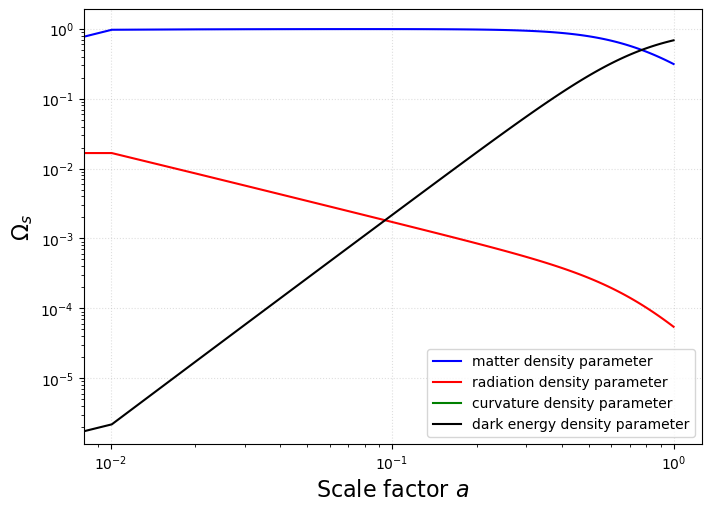

In [112]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(7, 5), constrained_layout = True)

ax.loglog(aa, a_omega_m, color='blue', label='matter density parameter')
ax.loglog(aa, a_omega_r, color='red', label='radiation density parameter')
ax.loglog(aa, a_omega_k, color='green', label='curvature density parameter')
ax.loglog(aa, a_omega_de, color='black', label='dark energy density parameter')

#ax.set_yscale('log')

ax.grid(alpha=0.4, ls=':')

ax.legend()
ax.set_xlabel(r'Scale factor $a$', fontsize=16)
ax.set_ylabel(r'$\Omega_{s}$', fontsize=16)

## P7

In [14]:
# parametros
Omegab = 0.05
Omegac = 0.2
Omegam = Omegab + Omegac
Omegal = 0.75
Omegar = 10**(-4)
Omegak = 0
w = -1
H0 = 67.4
c = 3*10**8


def Fk(z,Omegak):
    y,err = quad(f,0,z)
    if Omegak > 0:
        output = c*np.sinh(np.sqrt(Omegak)*y)/(H0*np.sqrt(Omegak))
    elif Omegak == 0:
        output = c*y/H0
    else:
        output = c*np.sin(np.sqrt(-Omegak)*y)/(H0*np.sqrt(-Omegak))
    return output


def f(x):
    return 1/E(x)


def Hz(z):
    z1 = 1 + z
    output = H0**2*(Omegar*z1**4 + Omegam*z1**3 + Omegal*z1**(3*(1+w)) + Omegak*z1**2) 
    return output


def E(z):
    return Hz(z)/H0 

In [15]:
# Distancias
def Da(z):
    return Fk(z,Omegak)/(1+z)


def Dl(z):
    return (1+z)*Fk(z,Omegak)

In [17]:
D_ang = np.zeros(len(zs))
D_lum = np.zeros(len(zs))
for i in range(len(zs)):
    D_ang[i] = Da(zs[i])
    D_lum[i] = Dl(zs[i])

Text(0, 0.5, '$d$ [Mpc]')

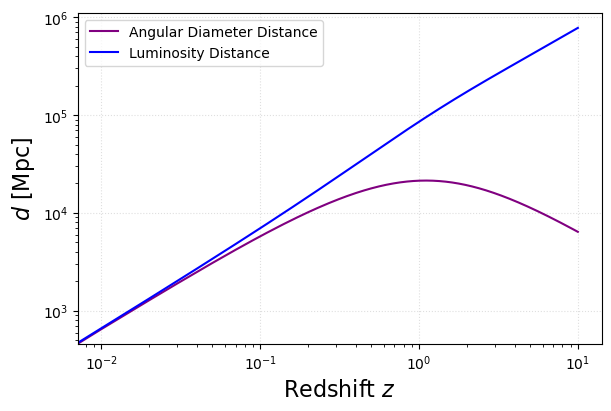

In [18]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True)

ax.loglog(zs, D_ang, color='purple', label='Angular Diameter Distance')
ax.loglog(zs, D_lum, color='b', label='Luminosity Distance')

ax.grid(alpha=0.4, ls=':')

ax.legend()
ax.set_xlabel(r'Redshift $z$', fontsize=16)
ax.set_ylabel(r'$d$ [Mpc]', fontsize=16)